<a href="https://colab.research.google.com/github/CharlesPoletowin/BigDataProject/blob/main/Reproducibility%20evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reproducibility evaluation
This part is **group 5's** work, we, **Chuanyu Zhou(cz2117), Yiming Li (yl7538), Pinshuo Ye (py2033)** , try to reproduce group 14's (https://github.com/kateinUs/BigDataFinalPorject) job.
I try to run this ipynb on Google colab, it seems easy to install the package we need. Meanwhile, the github readme has told me that the depedency package version, which is useful for others to run the code.

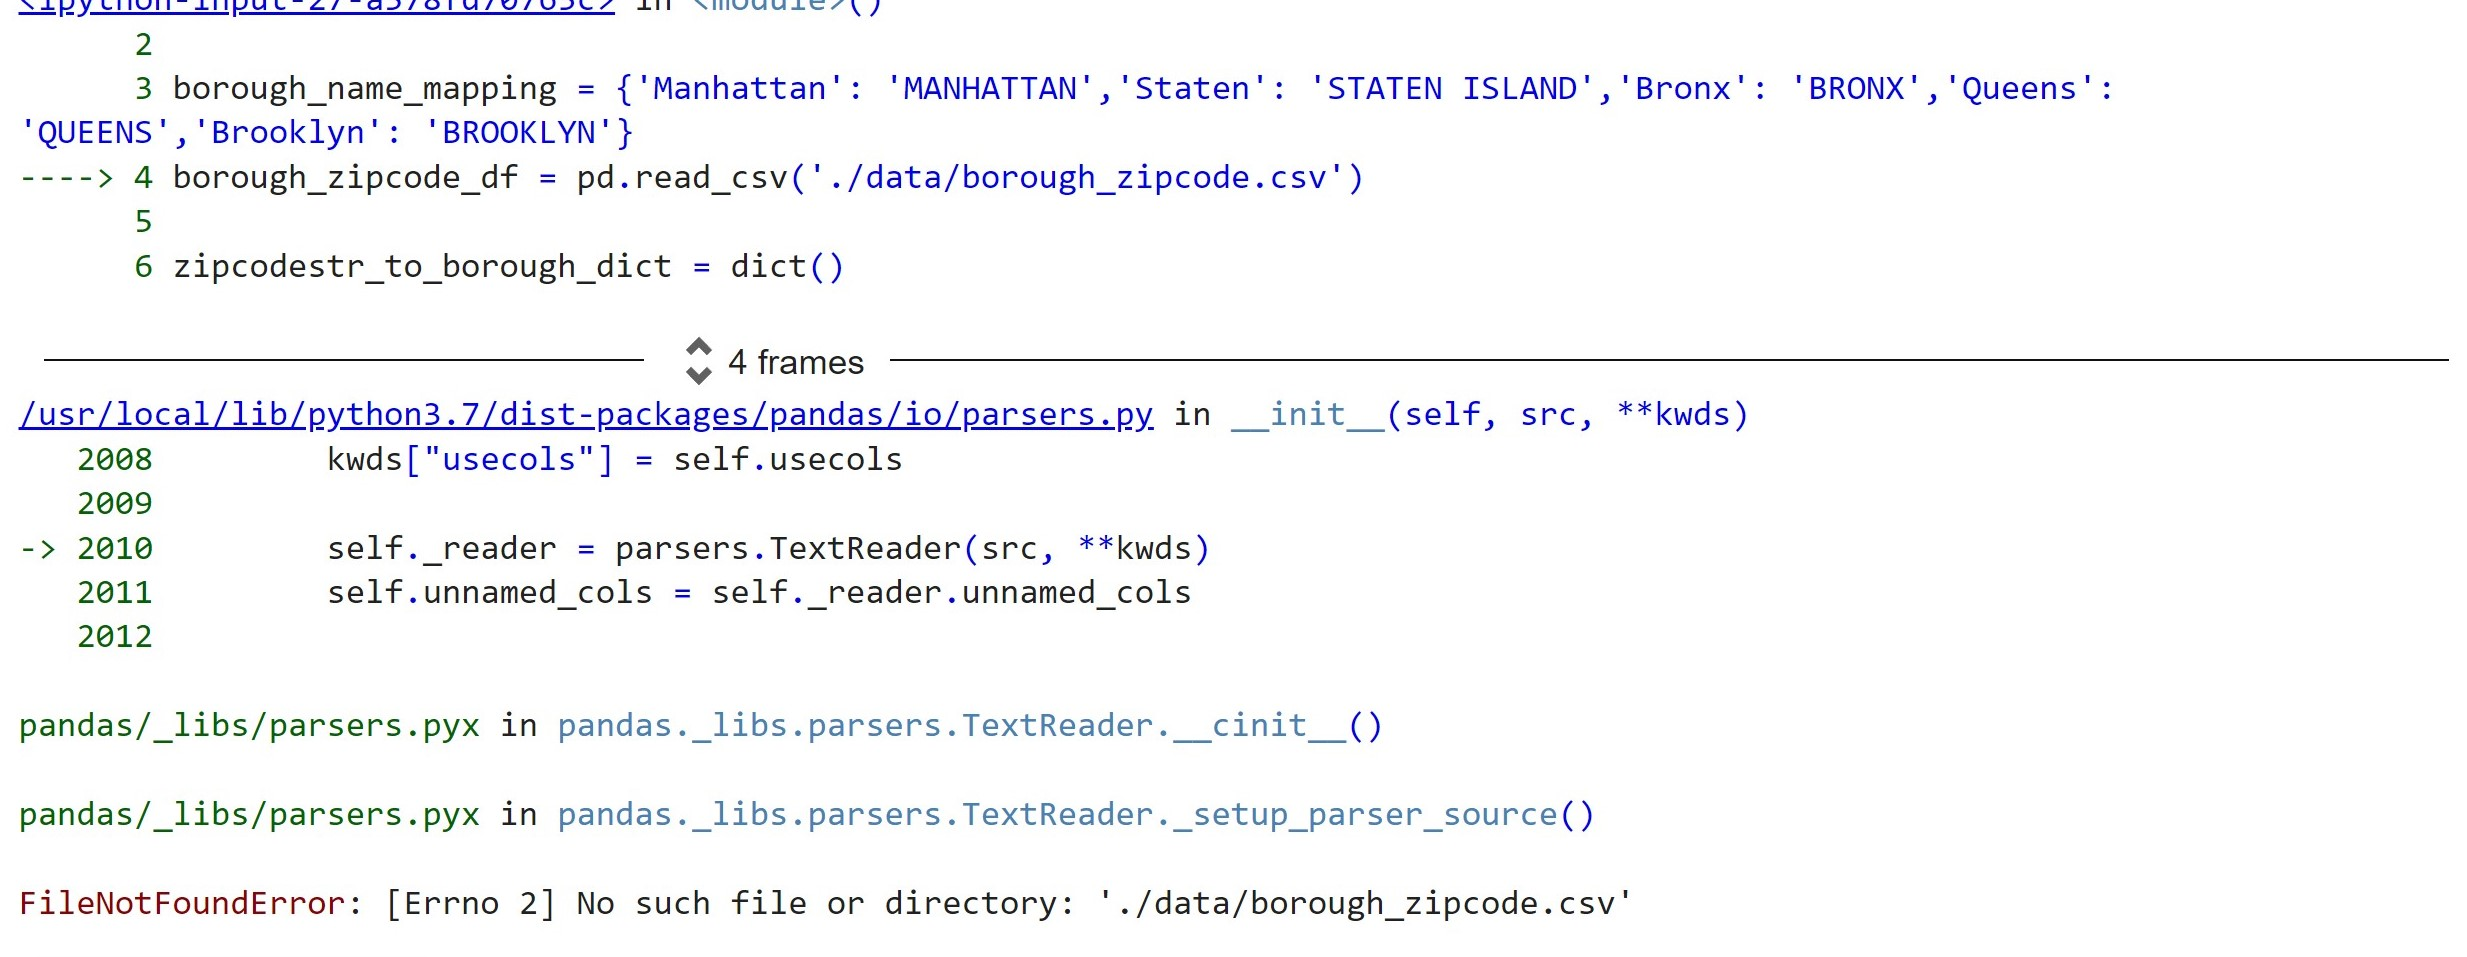

The first problem I meet has posted as a picture below. The reason is that the code doesn't contain git clone or wget command to get the files we need. So I add the following code to make sure the files which will contain in the folder the original author assumes.

another problem I met is as followed. Indent doesn't match.
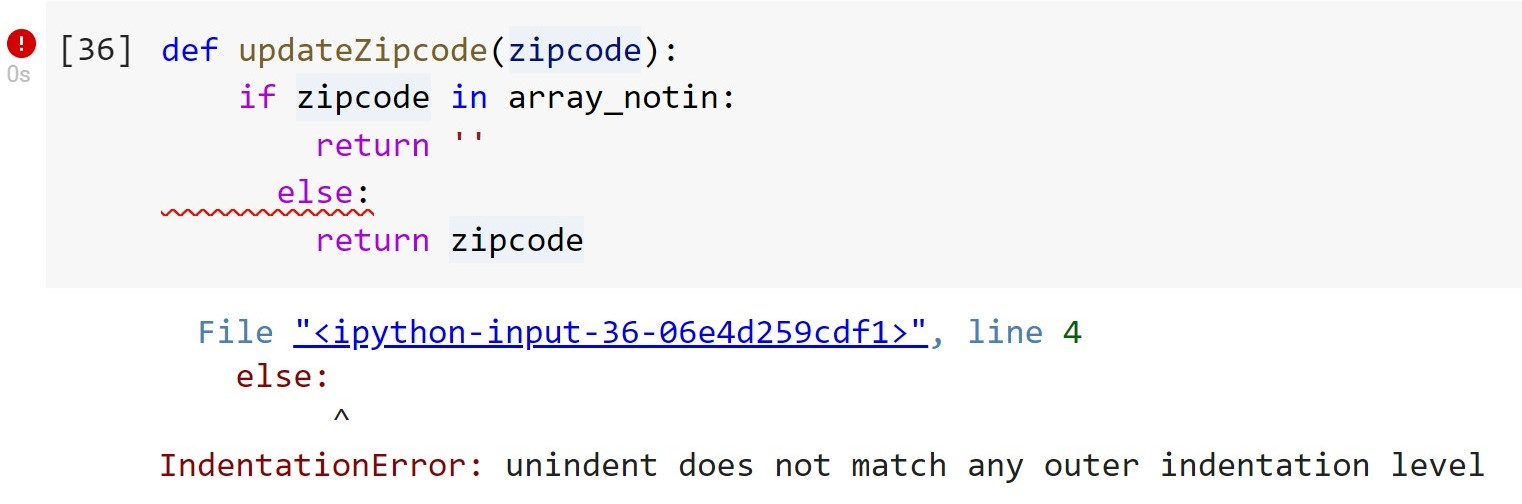

after this modification, it seems normal to run all other codes. For the results from this ipynb, it seems similar and almost the same to the original one.

## technique feedbacks
For the technique they used, which can be summarized as dealing with data type inconsistencies, fixing typos, missing values, gegraphical data consistency check. 

For data type errors or inconsistencies, they try to change string types in some of the integer valued columns to integer, which is a good way to eliminate potential problems in future summarize or clean.

For fixing typos part, they do some normal adjustment like removing trailing and leading whitespace, changing the string to lowercase, removing punctuation characters to normalize the string, and etc.

For geographical data part, they use geo-json data for latitude and longitude part check, zipcode to borough dict for consistency in zipcoe and borough part checking.

What surprised me is that they used Jaccard containment to try to find 10 other datasets whose column similar to Vehicle Collision Crashes, which seems innovative and efficient.

## Summary
thanks for their great job in this ipynb for us to reproduce their work easily and their github readme file for me to understand each file's effect.

In [28]:
!mkdir data
!wget https://github.com/kateinUs/BigDataFinalPorject/raw/master/data/borough_zipcode.csv
!mv borough_zipcode.csv data/borough_zipcode.csv
!wget https://raw.githubusercontent.com/kateinUs/BigDataFinalPorject/master/data/nyu-2451-34509-geojson.json
!mv nyu-2451-34509-geojson.json data/nyu-2451-34509-geojson.json
!ls data/

--2021-12-17 01:18:05--  https://github.com/kateinUs/BigDataFinalPorject/raw/master/data/borough_zipcode.csv
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/kateinUs/BigDataFinalPorject/master/data/borough_zipcode.csv [following]
--2021-12-17 01:18:06--  https://raw.githubusercontent.com/kateinUs/BigDataFinalPorject/master/data/borough_zipcode.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3486 (3.4K) [text/plain]
Saving to: ‘borough_zipcode.csv’

borough_zipcode.csv 100%[===================>]   3.40K  --.-KB/s    in 0s      

2021-12-17 01:18:06 (40.1 MB/s) - ‘borough_zipcode.csv’ saved [3

----

# here starts the original ipynb

# Motor Vehicle Collisions -- Data Profiling and Data Cleaning

## Dataset and Streams

The [Motor Vehicle Collisions](https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95) dataset contains information from all police reported motor vehicle collisions in NYC. Each row represents a crash event. 

The dataset consists of 1.84 million rows and uncompressed data file is about 377MB in size. 

**[OpenClean](https://github.com/VIDA-NYU/openclean)** is a Python library for data profiling and data cleaning. It is primarily intended for tabular datasets, which are represented as pandas data frames. After downloading the dataset file, we can, for example, open it as a data frame using the pandas.read_csv() function. This requires reading the full dataset into main memory. For large datasets this may not be feasible, and in some cases we don’t need all the data. For these scenarios, openclean’s data streaming operator allows us to apply data profiling, filtering, and transformation operations directly on a stream of rows that are read from the file. 

In [ ]:
pip install openclean

In [ ]:
pip install humanfriendly

In [ ]:
pip install openclean_geo

In [ ]:
pip install turfpy

In [5]:
from openclean.data.source.socrata import Socrata

for dataset in Socrata().catalog(domain='data.cityofnewyork.us'):
    if 'motor' in dataset.name.lower():
        print(f'{dataset.identifier}\t{dataset.domain}\t{dataset.name}')

h9gi-nx95	data.cityofnewyork.us	Motor Vehicle Collisions - Crashes
bm4k-52h4	data.cityofnewyork.us	Motor Vehicle Collisions - Vehicles
f55k-p6yu	data.cityofnewyork.us	Motor Vehicle Collisions - Person


In [6]:
import gzip
import humanfriendly
import os

dataset = Socrata().dataset('h9gi-nx95')

# By default, this example uses a small sample of the full dataset that
# is included in the 'data' subfolder within this repository.
#datafile = './data/jt7v-77mi.tsv.gz'

# Remove the comment for this line if you want to use the full dataset.
datafile = './h9gi-nx95.tsv.gz'


# Download file only if it does not exist already.
if not os.path.isfile(datafile):
    with gzip.open(datafile, 'wb') as f:
        print('Downloading ...\n')
        dataset.write(f)


fsize = humanfriendly.format_size(os.stat(datafile).st_size)
print("Using '{}' in file {} of size {}".format(dataset.name, datafile, fsize))

Using 'Motor Vehicle Collisions - Crashes' in file ./h9gi-nx95.tsv.gz of size 73.42 MB


In [7]:
from openclean.pipeline import stream

ds_full = stream(datafile)

In [8]:
# Count number of records in the datasets.

print(f'{ds_full.count():,} rows.')

1,850,023 rows.


In [9]:
ds = ds_full
ds_full.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,04/14/2021,5:32,,,,,,BRONX WHITESTONE BRIDGE,,,0,0,0,0,0,0,0,0,Following Too Closely,Unspecified,,,,4407480,Sedan,Sedan,,,
1,04/13/2021,21:35,BROOKLYN,11217,40.68358,-73.97617,"(40.68358, -73.97617)",,,620 ATLANTIC AVENUE,1,0,1,0,0,0,0,0,Unspecified,,,,,4407147,Sedan,,,,
2,04/15/2021,16:15,,,,,,HUTCHINSON RIVER PARKWAY,,,0,0,0,0,0,0,0,0,Pavement Slippery,,,,,4407665,Station Wagon/Sport Utility Vehicle,,,,
3,04/13/2021,16:00,BROOKLYN,11222,,,,VANDERVORT AVENUE,ANTHONY STREET,,0,0,0,0,0,0,0,0,Following Too Closely,Unspecified,,,,4407811,Sedan,,,,
4,04/12/2021,8:25,,,0,0,"(0.0, 0.0)",EDSON AVENUE,,,0,0,0,0,0,0,0,0,Unspecified,Unspecified,,,,4406885,Station Wagon/Sport Utility Vehicle,Sedan,,,
5,04/13/2021,17:11,,,,,,VERRAZANO BRIDGE UPPER,,,0,0,0,0,0,0,0,0,Following Too Closely,Unspecified,,,,4407883,Sedan,Box Truck,,,
6,04/13/2021,17:30,QUEENS,11106,,,,33 st,31ave,,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,,,,4408019,Sedan,Sedan,,,
7,04/16/2021,23:30,,,,,,SHORE PARKWAY,,,0,0,0,0,0,0,0,0,Unspecified,,,,,4408060,Sedan,,,,
8,04/11/2021,17:00,,,,,,GOWANUS RAMP,,,1,0,0,0,0,0,1,0,Other Vehicular,Other Vehicular,,,,4406314,Sedan,Sedan,,,
9,04/16/2021,21:15,,,,,,BRONX RIVER PARKWAY RAMP,,,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,,,,4408149,Station Wagon/Sport Utility Vehicle,Sedan,,,


## Data Profiling

Data profiling refers to the activity of creating small but informative summaries of a database. Profiling helps users to gain an understanding of the data properties and to uncover data quality flaws.

Openclean supports a variety of different data profiling operators.

In [10]:
# Profile the dataset view using the default data profiler.

from openclean.profiling.column import DefaultColumnProfiler

profiles = ds.profile(default_profiler=DefaultColumnProfiler)

In [11]:
# Print overview of profiling results.

profiles.stats()

,total,empty,distinct,uniqueness,entropy
CRASH DATE,1850023,0,3453,0.001866,11.689576
CRASH TIME,1850023,0,1440,0.000778,8.931776
BOROUGH,1850023,571771,5,0.000004,2.118396
ZIP CODE,1850023,571993,232,0.000182,7.221087
LATITUDE,1850023,215823,122570,0.075003,15.634731
LONGITUDE,1850023,215823,96081,0.058794,15.343019
LOCATION,1850023,215823,245180,0.150031,16.188122
ON STREET NAME,1850023,378699,16167,0.010988,10.604661
CROSS STREET NAME,1850023,666765,19282,0.016296,11.809651
OFF STREET NAME,1850023,1563693,181034,0.632256,16.925978


Combining profiling results with columns introduction in the [website](https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95), we know that the Motor Vehicle Collisions dataset has 29 columns.

* CRASH DATE: Occurrence date of collision. It does not have empty values.
* CRASH TIME: Occurrence time of collision. It does not have empty values.
* BOROUGH: Borough where collision occurred. It has empty values. It has 5 distinct values.
* ZIP CODE: Postal code of incident occurrence. It has empty values.
* LATITUDE: Latitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326). It has empty values.
* LONGITUDE: Longitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326). It has empty values.
* LOCATION: Latitude, Longitude pair. It has empty values.
* ON STREET NAME: Street on which the collision occurred. It has empty values.
* CROSS STREET NAME: Nearest cross street to the collision. It has empty values.
* OFF STREET NAME: Street address if known. It has empty values.		
* NUMBER OF PERSONS INJURED: Number of persons injured.
* NUMBER OF PERSONS KILLED: Number of persons killed.	
* NUMBER OF PEDESTRIANS INJURED: Number of pedestrians injured.		
* NUMBER OF PEDESTRIANS KILLED:	Number of pedestrians killed.
* NUMBER OF CYCLIST INJURED: Number of cyclists injured.	
* NUMBER OF CYCLIST KILLED:	Number of cyclists killed.
* NUMBER OF MOTORIST INJURED: Number of vehicle occupants injured.
* NUMBER OF MOTORIST KILLED: Number of vehicle occupants killed.
* CONTRIBUTING FACTOR VEHICLE 1,2,3,4,5: Factors contributing to the collision for designated vehicle.	
* COLLISION_ID: Unique record code generated by system. Primary Key for Crash table. It does not have empty values.
* VEHICLE TYPE CODE 1,2,3,4,5: Type of vehicle based on the selected vehicle category.

In [12]:
profiles.types()

,date,float,int,str
CRASH DATE,3453,0,0,0
CRASH TIME,0,0,0,1440
BOROUGH,0,0,0,5
ZIP CODE,0,0,231,1
LATITUDE,0,122569,1,0
LONGITUDE,0,96079,2,0
LOCATION,0,0,0,245180
ON STREET NAME,87,0,16,16064
CROSS STREET NAME,2,1,28,19251
OFF STREET NAME,31,0,1,181002


This dataset has some type errors.

In [13]:
# Print the most frequent data type for each column.

print('Schema\n------')
for col in ds.columns:
    p = profiles.column(col)
    print("  '{}' ({})".format(col, p['datatypes']['distinct'].most_common(1)[0][0]))

Schema
------
  'CRASH DATE' (date)
  'CRASH TIME' (str)
  'BOROUGH' (str)
  'ZIP CODE' (int)
  'LATITUDE' (float)
  'LONGITUDE' (float)
  'LOCATION' (str)
  'ON STREET NAME' (str)
  'CROSS STREET NAME' (str)
  'OFF STREET NAME' (str)
  'NUMBER OF PERSONS INJURED' (int)
  'NUMBER OF PERSONS KILLED' (int)
  'NUMBER OF PEDESTRIANS INJURED' (int)
  'NUMBER OF PEDESTRIANS KILLED' (int)
  'NUMBER OF CYCLIST INJURED' (int)
  'NUMBER OF CYCLIST KILLED' (int)
  'NUMBER OF MOTORIST INJURED' (int)
  'NUMBER OF MOTORIST KILLED' (int)
  'CONTRIBUTING FACTOR VEHICLE 1' (str)
  'CONTRIBUTING FACTOR VEHICLE 2' (str)
  'CONTRIBUTING FACTOR VEHICLE 3' (str)
  'CONTRIBUTING FACTOR VEHICLE 4' (str)
  'CONTRIBUTING FACTOR VEHICLE 5' (str)
  'COLLISION_ID' (int)
  'VEHICLE TYPE CODE 1' (str)
  'VEHICLE TYPE CODE 2' (str)
  'VEHICLE TYPE CODE 3' (str)
  'VEHICLE TYPE CODE 4' (str)
  'VEHICLE TYPE CODE 5' (str)


### Explore some data properties

In [14]:
# Print the minimum and maximum value for column 'Issue Date'

profiles.minmax('CRASH DATE')

,min,max
date,2012-07-01,2021-12-13


In [15]:
# Print the most frequent values in column 'Violation Time'

profiles.column('CRASH TIME').get('topValues')

[('16:00', 26338),
 ('17:00', 25818),
 ('15:00', 25588),
 ('18:00', 23864),
 ('14:00', 23490),
 ('13:00', 21849),
 ('9:00', 19697),
 ('19:00', 19646),
 ('12:00', 19597),
 ('16:30', 19097)]

In [16]:
# Print the most frequent values in column 'BOROUGH'

profiles.column('BOROUGH').get('topValues')

[('BROOKLYN', 402550),
 ('QUEENS', 342400),
 ('MANHATTAN', 293647),
 ('BRONX', 185816),
 ('STATEN ISLAND', 53839)]

## Data cleaning

Data cleaning is the process of detecting and repairing corrupt or inaccurate records from a data set in order to improve the quality of data.

### 1. Types and Outliers

###### (1) CRASH DATE

In [17]:
df = ds.to_df()

In [18]:
print(df['CRASH DATE'].dtypes)

object


In [19]:
import pandas as pd
# Convert to proper date format
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])

In [20]:
print(df['CRASH DATE'].dtypes)

datetime64[ns]


In [21]:
df['CRASH DATE'].value_counts()

2014-01-21    1161
2018-11-15    1065
2017-12-15     999
2017-05-19     974
2015-01-18     961
              ... 
2020-04-23     108
2020-04-12     106
2020-04-09     103
2020-04-19     102
2020-04-05      94
Name: CRASH DATE, Length: 3453, dtype: int64

###### (2) CRASH TIME

In [22]:
def TimeIsValid(time1):
  x = time1.split(':')
  if int(x[0])>=0 and int(x[0])<24 and int(x[1])>=0 and int(x[1])<60:
    return True
  else:
    return False

In [23]:
timetotal = df['CRASH TIME'].apply(TimeIsValid)
timetotal.value_counts()

True    1850023
Name: CRASH TIME, dtype: int64

In [24]:
# Convert to proper time format
df['CRASH TIME'] = pd.to_datetime(df['CRASH TIME']).dt.time

In [25]:
df['CRASH TIME'].value_counts()

16:00:00    26338
17:00:00    25818
15:00:00    25588
18:00:00    23864
14:00:00    23490
            ...  
05:31:00       77
03:59:00       76
04:31:00       75
04:02:00       74
03:31:00       70
Name: CRASH TIME, Length: 1440, dtype: int64

###### (3)BOROUGH



In [26]:
df['BOROUGH'].value_counts()

                 571771
BROOKLYN         402550
QUEENS           342400
MANHATTAN        293647
BRONX            185816
STATEN ISLAND     53839
Name: BOROUGH, dtype: int64

Therefore, except for null value, BOROUGH has no outliers.

###### (4)ZIP CODE

- reference: 

In [29]:
import pandas as pd

borough_name_mapping = {'Manhattan': 'MANHATTAN','Staten': 'STATEN ISLAND','Bronx': 'BRONX','Queens': 'QUEENS','Brooklyn': 'BROOKLYN'}
borough_zipcode_df = pd.read_csv('./data/borough_zipcode.csv')

zipcodestr_to_borough_dict = dict()
zipcodes_to_borough_dict = dict()
for index, row in borough_zipcode_df.iterrows():
    zipcodestr_to_borough_dict[str(row['ZIP_CODE'])] = borough_name_mapping[row['BOROUGH']]
    zipcodes_to_borough_dict[row['ZIP_CODE']] = borough_name_mapping[row['BOROUGH']]

# To take a look at zipcode_to_borough_dict
zipcodes_to_borough_dict

{10001: 'MANHATTAN',
 10002: 'MANHATTAN',
 10003: 'MANHATTAN',
 10004: 'MANHATTAN',
 10005: 'MANHATTAN',
 10006: 'MANHATTAN',
 10007: 'MANHATTAN',
 10009: 'MANHATTAN',
 10010: 'MANHATTAN',
 10011: 'MANHATTAN',
 10012: 'MANHATTAN',
 10013: 'MANHATTAN',
 10014: 'MANHATTAN',
 10015: 'MANHATTAN',
 10016: 'MANHATTAN',
 10017: 'MANHATTAN',
 10018: 'MANHATTAN',
 10019: 'MANHATTAN',
 10020: 'MANHATTAN',
 10021: 'MANHATTAN',
 10022: 'MANHATTAN',
 10023: 'MANHATTAN',
 10024: 'MANHATTAN',
 10025: 'MANHATTAN',
 10026: 'MANHATTAN',
 10027: 'MANHATTAN',
 10028: 'MANHATTAN',
 10029: 'MANHATTAN',
 10030: 'MANHATTAN',
 10031: 'MANHATTAN',
 10032: 'MANHATTAN',
 10033: 'MANHATTAN',
 10034: 'MANHATTAN',
 10035: 'MANHATTAN',
 10036: 'MANHATTAN',
 10037: 'MANHATTAN',
 10038: 'MANHATTAN',
 10039: 'MANHATTAN',
 10040: 'MANHATTAN',
 10041: 'MANHATTAN',
 10044: 'MANHATTAN',
 10045: 'MANHATTAN',
 10048: 'MANHATTAN',
 10055: 'MANHATTAN',
 10060: 'MANHATTAN',
 10069: 'MANHATTAN',
 10090: 'MANHATTAN',
 10095: 'MANH

Given all the zip codes in NYC, check if all of them are in the range.

In [30]:
zipcodes_list = list(zipcodestr_to_borough_dict.keys())

In [31]:
df_zipcode = df[['ZIP CODE']]

In [32]:
df_notin = df_zipcode[~df_zipcode['ZIP CODE'].isin(zipcodes_list)]
df_notin['ZIP CODE'].unique()

array(['', '10065', '11001', '10000', '11040', '10075', '11695', '11251',
       '11005', '10179', '     ', '10803'], dtype=object)

In [33]:
# Find all the zip codes that are not in NYC
# They might be typo, so we need to check the zip code based on more specific geographic location information, 
# e.g. latitude,longtitude, on street name, cross street name, off street name
df_notin['ZIP CODE'].value_counts()

         571993
10065      8757
10075      3095
11001       551
11040       462
10000       354
11005       101
             42
11695        14
10179         2
11251         2
10803         2
Name: ZIP CODE, dtype: int64

In [34]:
array_notin = df_notin['ZIP CODE'].unique()

In [37]:
def updateZipcode(zipcode):
    if zipcode in array_notin:
        return ''
    else:
        return zipcode

In [38]:
#Update those rows whose ZIP CODE are outliers to empty string
df['ZIP CODE'] = df['ZIP CODE'].apply(updateZipcode)

In [39]:
df['ZIP CODE'].value_counts()

         585375
11207     24037
11101     17344
11236     16742
11203     16207
          ...  
11242         2
10166         1
11241         1
10176         1
10055         1
Name: ZIP CODE, Length: 222, dtype: int64

In [40]:
check_array = ['11001','10000','11040','10803']
for i in check_array:
  print(df.loc[df['ZIP CODE']==i].value_counts())

Series([], dtype: int64)
Series([], dtype: int64)
Series([], dtype: int64)
Series([], dtype: int64)


Now, all the invalid zip codes become empty string.

In [41]:
df.loc[df['ZIP CODE']=='','ZIP CODE']='-1'

In [42]:
df['ZIP CODE'] = df['ZIP CODE'].astype('int')
df['ZIP CODE'].dtypes

dtype('int64')

###### (5)LATITUDE and LONGITUDE

In [43]:
df.loc[df['LATITUDE']=='','LATITUDE']='-1'
df.loc[df['LATITUDE']=='0','LATITUDE']='-1'

In [44]:
df['LATITUDE'].value_counts()

-1            217952
40.861862        732
40.8047          691
40.608757        670
40.696033        663
               ...  
40.6097697         1
40.73654           1
40.5151            1
40.873898          1
40.7276518         1
Name: LATITUDE, Length: 122570, dtype: int64

In [45]:
df['LATITUDE'] = df['LATITUDE'].astype('float')

In [46]:
df['LATITUDE'].dtypes

dtype('float64')

In [47]:
df['LONGITUDE'].value_counts()

               215823
0                2129
-73.91282         716
-73.98453         696
-74.038086        672
                ...  
-73.8028359         1
-74.021126          1
-73.8608264         1
-74.1654461         1
-74.078865          1
Name: LONGITUDE, Length: 96082, dtype: int64

In [48]:
df.loc[df['LONGITUDE']=='','LONGITUDE']='-1'
df.loc[df['LONGITUDE']=='0','LONGITUDE']='-1'

In [49]:
df['LONGITUDE'].value_counts()

-1             217952
-73.91282         716
-73.98453         696
-74.038086        672
-73.91243         645
                ...  
-74.021126          1
-73.8608264         1
-74.1654461         1
-73.740524          1
-74.16112           1
Name: LONGITUDE, Length: 96081, dtype: int64

In [50]:
df['LONGITUDE'] = df['LONGITUDE'].astype('float')
df['LONGITUDE'].dtypes

dtype('float64')

###### (6) Location

In [51]:
df['LOCATION'].value_counts()

                           215823
(0.0, 0.0)                   2129
(40.861862, -73.91282)        685
(40.608757, -74.038086)       670
(40.696033, -73.98453)        646
                            ...  
(40.71352, -73.78832)           1
(40.64355, -74.01079)           1
(40.63595, -74.08102)           1
(40.817924, -73.92483)          1
(40.646515, -73.90921)          1
Name: LOCATION, Length: 245181, dtype: int64

In [52]:
df.loc[df['LOCATION']=='','LOCATION']='NULL'
df.loc[df['LOCATION']=='(0.0, 0.0)','LOCATION']='NULL'

In [53]:
df['LOCATION'].value_counts()

NULL                       217952
(40.861862, -73.91282)        685
(40.608757, -74.038086)       670
(40.696033, -73.98453)        646
(40.8047, -73.91243)          597
                            ...  
(40.760136, -73.76646)          1
(40.71352, -73.78832)           1
(40.64355, -74.01079)           1
(40.63595, -74.08102)           1
(40.62291, -74.149414)          1
Name: LOCATION, Length: 245180, dtype: int64

###### (6) INJURED PEOPLE

In [54]:
df['NUMBER OF PERSONS INJURED'].value_counts()

0     1465241
1      298119
2       56248
3       18544
4        6951
5        2752
6        1133
7         489
8         207
9         115
10         71
11         41
12         27
13         18
           18
16          8
14          8
15          7
18          5
17          5
19          4
24          3
22          3
20          2
27          1
31          1
32          1
43          1
Name: NUMBER OF PERSONS INJURED, dtype: int64

In [55]:
df.loc[df['NUMBER OF PERSONS INJURED']=='','NUMBER OF PERSONS INJURED']='-1'

In [56]:
df['NUMBER OF PERSONS INJURED'].value_counts()

0     1465241
1      298119
2       56248
3       18544
4        6951
5        2752
6        1133
7         489
8         207
9         115
10         71
11         41
12         27
13         18
-1         18
16          8
14          8
15          7
18          5
17          5
19          4
24          3
22          3
20          2
43          1
27          1
31          1
32          1
Name: NUMBER OF PERSONS INJURED, dtype: int64

In [57]:
df['NUMBER OF PERSONS INJURED'] = df['NUMBER OF PERSONS INJURED'].astype('int')
df['NUMBER OF PERSONS INJURED'].dtypes

dtype('int64')

In [58]:
df['NUMBER OF PEDESTRIANS INJURED'].value_counts()

0     1757335
1       89320
2        2971
3         307
4          50
5          20
6          11
7           3
9           2
27          1
8           1
15          1
13          1
Name: NUMBER OF PEDESTRIANS INJURED, dtype: int64

In [59]:
df['NUMBER OF PEDESTRIANS INJURED'] = df['NUMBER OF PEDESTRIANS INJURED'].astype('int')
df['NUMBER OF PEDESTRIANS INJURED'].dtypes

dtype('int64')

In [60]:
df['NUMBER OF CYCLIST INJURED'].value_counts()

0    1806024
1      43542
2        439
3         17
4          1
Name: NUMBER OF CYCLIST INJURED, dtype: int64

In [61]:
df['NUMBER OF CYCLIST INJURED'] = df['NUMBER OF CYCLIST INJURED'].astype('int')
df['NUMBER OF CYCLIST INJURED'].dtypes

dtype('int64')

In [62]:
df['NUMBER OF MOTORIST INJURED'].value_counts()

0     1601968
1      166763
2       51692
3       18007
4        6812
5        2714
6        1093
7         465
8         199
9         112
10         69
11         40
12         26
13         18
14          9
16          8
15          5
18          5
17          4
24          3
19          3
20          2
22          2
31          1
43          1
21          1
30          1
Name: NUMBER OF MOTORIST INJURED, dtype: int64

In [63]:
df['NUMBER OF MOTORIST INJURED'] = df['NUMBER OF MOTORIST INJURED'].astype('int')
df['NUMBER OF MOTORIST INJURED'].dtypes

dtype('int64')

###### (7) KILLED PEOPLE

In [64]:
df['NUMBER OF PERSONS KILLED'].value_counts()

0    1847635
1       2286
2         57
          31
3          9
4          3
5          1
8          1
Name: NUMBER OF PERSONS KILLED, dtype: int64

In [65]:
df.loc[df['NUMBER OF PERSONS KILLED']=='','NUMBER OF PERSONS KILLED']='-1'
df['NUMBER OF PERSONS KILLED'].value_counts()

0     1847635
1        2286
2          57
-1         31
3           9
4           3
5           1
8           1
Name: NUMBER OF PERSONS KILLED, dtype: int64

In [66]:
df['NUMBER OF PERSONS KILLED'] = df['NUMBER OF PERSONS KILLED'].astype('int')
df['NUMBER OF PERSONS KILLED'].dtypes

dtype('int64')

In [67]:
df['NUMBER OF PEDESTRIANS KILLED'].value_counts()

0    1848776
1       1235
2         11
6          1
Name: NUMBER OF PEDESTRIANS KILLED, dtype: int64

In [68]:
df['NUMBER OF PEDESTRIANS KILLED'] = df['NUMBER OF PEDESTRIANS KILLED'].astype('int')
df['NUMBER OF PEDESTRIANS KILLED'].dtypes

dtype('int64')

In [69]:
df['NUMBER OF MOTORIST KILLED'].value_counts()

0    1849105
1        862
2         44
3          9
4          2
5          1
Name: NUMBER OF MOTORIST KILLED, dtype: int64

In [70]:
df['NUMBER OF MOTORIST KILLED'] = df['NUMBER OF MOTORIST KILLED'].astype('int')
df['NUMBER OF MOTORIST KILLED'].dtypes

dtype('int64')

In [71]:
df['NUMBER OF CYCLIST KILLED'].value_counts()

0    1849839
1        183
2          1
Name: NUMBER OF CYCLIST KILLED, dtype: int64

In [72]:
df['NUMBER OF CYCLIST KILLED'] = df['NUMBER OF CYCLIST KILLED'].astype('int')
df['NUMBER OF CYCLIST KILLED'].dtypes

dtype('int64')

###### (8) CONTRIBUTING FACTOR VEHICLE 

In [73]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth',100)

In [74]:
df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()

Unspecified                                              652802
Driver Inattention/Distraction                           359340
Failure to Yield Right-of-Way                            107403
Following Too Closely                                     96613
Backing Unsafely                                          69859
Other Vehicular                                           58054
Passing or Lane Usage Improper                            47811
Fatigued/Drowsy                                           47152
Turning Improperly                                        45995
Passing Too Closely                                       43648
Unsafe Lane Changing                                      36185
Traffic Control Disregarded                               30371
Driver Inexperience                                       27992
Unsafe Speed                                              20771
Lost Consciousness                                        20056
Alcohol Involvement                     

In [75]:
df.loc[df['CONTRIBUTING FACTOR VEHICLE 1']=='1','CONTRIBUTING FACTOR VEHICLE 1']='Unspecified'
df.loc[df['CONTRIBUTING FACTOR VEHICLE 1']=='80','CONTRIBUTING FACTOR VEHICLE 1']='Unspecified'
df.loc[df['CONTRIBUTING FACTOR VEHICLE 1']=='','CONTRIBUTING FACTOR VEHICLE 1']='Unspecified'

In [76]:
df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()

Unspecified                                              658286
Driver Inattention/Distraction                           359340
Failure to Yield Right-of-Way                            107403
Following Too Closely                                     96613
Backing Unsafely                                          69859
Other Vehicular                                           58054
Passing or Lane Usage Improper                            47811
Fatigued/Drowsy                                           47152
Turning Improperly                                        45995
Passing Too Closely                                       43648
Unsafe Lane Changing                                      36185
Traffic Control Disregarded                               30371
Driver Inexperience                                       27992
Unsafe Speed                                              20771
Lost Consciousness                                        20056
Alcohol Involvement                     

In [77]:
df['CONTRIBUTING FACTOR VEHICLE 2'].value_counts()

Unspecified                                              1330666
                                                          268810
Driver Inattention/Distraction                             84349
Other Vehicular                                            29577
Following Too Closely                                      16380
Failure to Yield Right-of-Way                              15613
Passing or Lane Usage Improper                             11139
Fatigued/Drowsy                                            10831
Turning Improperly                                          8231
Passing Too Closely                                         7734
Backing Unsafely                                            7530
Traffic Control Disregarded                                 6287
Driver Inexperience                                         6066
Unsafe Lane Changing                                        6052
Lost Consciousness                                          5227
Unsafe Speed             

In [78]:
df.loc[df['CONTRIBUTING FACTOR VEHICLE 2']=='1','CONTRIBUTING FACTOR VEHICLE 2']='Unspecified'
df.loc[df['CONTRIBUTING FACTOR VEHICLE 2']=='','CONTRIBUTING FACTOR VEHICLE 2']='Unspecified'
df.loc[df['CONTRIBUTING FACTOR VEHICLE 2']=='80','CONTRIBUTING FACTOR VEHICLE 2']='Unspecified'

In [79]:
df['CONTRIBUTING FACTOR VEHICLE 2'].value_counts()

Unspecified                                              1599503
Driver Inattention/Distraction                             84349
Other Vehicular                                            29577
Following Too Closely                                      16380
Failure to Yield Right-of-Way                              15613
Passing or Lane Usage Improper                             11139
Fatigued/Drowsy                                            10831
Turning Improperly                                          8231
Passing Too Closely                                         7734
Backing Unsafely                                            7530
Traffic Control Disregarded                                 6287
Driver Inexperience                                         6066
Unsafe Lane Changing                                        6052
Lost Consciousness                                          5227
Unsafe Speed                                                3995
Pavement Slippery        

In [80]:
df['CONTRIBUTING FACTOR VEHICLE 3'].value_counts()

                                                         1722992
Unspecified                                               118327
Other Vehicular                                             2351
Driver Inattention/Distraction                              1683
Following Too Closely                                       1633
Fatigued/Drowsy                                              853
Pavement Slippery                                            331
Reaction to Uninvolved Vehicle                               186
Driver Inexperience                                          167
Outside Car Distraction                                      154
Traffic Control Disregarded                                  147
Failure to Yield Right-of-Way                                133
Unsafe Speed                                                 113
Passing or Lane Usage Improper                                92
Backing Unsafely                                              90
Alcohol Involvement      

In [81]:
df.loc[df['CONTRIBUTING FACTOR VEHICLE 3']=='1','CONTRIBUTING FACTOR VEHICLE 3']='Unspecified'
df.loc[df['CONTRIBUTING FACTOR VEHICLE 3']=='','CONTRIBUTING FACTOR VEHICLE 3']='Unspecified'
df.loc[df['CONTRIBUTING FACTOR VEHICLE 3']=='80','CONTRIBUTING FACTOR VEHICLE 3']='Unspecified'

In [82]:
df['CONTRIBUTING FACTOR VEHICLE 3'].value_counts()

Unspecified                                              1841323
Other Vehicular                                             2351
Driver Inattention/Distraction                              1683
Following Too Closely                                       1633
Fatigued/Drowsy                                              853
Pavement Slippery                                            331
Reaction to Uninvolved Vehicle                               186
Driver Inexperience                                          167
Outside Car Distraction                                      154
Traffic Control Disregarded                                  147
Failure to Yield Right-of-Way                                133
Unsafe Speed                                                 113
Passing or Lane Usage Improper                                92
Backing Unsafely                                              90
Alcohol Involvement                                           89
Turning Improperly       

In [83]:
df['CONTRIBUTING FACTOR VEHICLE 4'].value_counts()

                                               1822195
Unspecified                                      26250
Other Vehicular                                    497
Following Too Closely                              310
Driver Inattention/Distraction                     230
Fatigued/Drowsy                                    170
Pavement Slippery                                   86
Reaction to Uninvolved Vehicle                      37
Outside Car Distraction                             25
Driver Inexperience                                 24
Unsafe Speed                                        23
Traffic Control Disregarded                         22
Fell Asleep                                         19
Alcohol Involvement                                 18
Obstruction/Debris                                  17
Failure to Yield Right-of-Way                       16
Backing Unsafely                                     9
Other Electronic Device                              9
Passing or

In [84]:
df.loc[df['CONTRIBUTING FACTOR VEHICLE 4']=='','CONTRIBUTING FACTOR VEHICLE 4']='Unspecified'

In [85]:
df['CONTRIBUTING FACTOR VEHICLE 4'].value_counts()

Unspecified                                    1848445
Other Vehicular                                    497
Following Too Closely                              310
Driver Inattention/Distraction                     230
Fatigued/Drowsy                                    170
Pavement Slippery                                   86
Reaction to Uninvolved Vehicle                      37
Outside Car Distraction                             25
Driver Inexperience                                 24
Unsafe Speed                                        23
Traffic Control Disregarded                         22
Fell Asleep                                         19
Alcohol Involvement                                 18
Obstruction/Debris                                  17
Failure to Yield Right-of-Way                       16
Other Electronic Device                              9
Backing Unsafely                                     9
Passing or Lane Usage Improper                       8
Failure to

In [86]:
df['CONTRIBUTING FACTOR VEHICLE 5'].value_counts()

                                               1842625
Unspecified                                       6974
Other Vehicular                                    147
Following Too Closely                               73
Driver Inattention/Distraction                      51
Fatigued/Drowsy                                     41
Pavement Slippery                                   35
Reaction to Uninvolved Vehicle                      11
Alcohol Involvement                                  9
Driver Inexperience                                  9
Obstruction/Debris                                   7
Unsafe Speed                                         6
Outside Car Distraction                              6
Failure to Yield Right-of-Way                        5
Traffic Control Disregarded                          3
Fell Asleep                                          3
Failure to Keep Right                                2
Other Electronic Device                              2
Drugs (ill

In [87]:
df.loc[df['CONTRIBUTING FACTOR VEHICLE 5']=='','CONTRIBUTING FACTOR VEHICLE 5']='Unspecified'

In [88]:
df['CONTRIBUTING FACTOR VEHICLE 5'].value_counts()

Unspecified                                    1849599
Other Vehicular                                    147
Following Too Closely                               73
Driver Inattention/Distraction                      51
Fatigued/Drowsy                                     41
Pavement Slippery                                   35
Reaction to Uninvolved Vehicle                      11
Alcohol Involvement                                  9
Driver Inexperience                                  9
Obstruction/Debris                                   7
Unsafe Speed                                         6
Outside Car Distraction                              6
Failure to Yield Right-of-Way                        5
Traffic Control Disregarded                          3
Fell Asleep                                          3
Failure to Keep Right                                2
Passing Too Closely                                  2
Other Electronic Device                              2
Drugs (ill

### 2. Typos

In [89]:
from openclean.cluster.key import KeyCollision
from openclean.function.value.key.fingerprint import Fingerprint
from openclean_geo.address.usstreet import USStreetNameKey

ds_fix_street = stream(df)
on_street_names = ds_fix_street.update('ON STREET NAME', str.upper).distinct('ON STREET NAME')
cross_street_names = ds_fix_street.update('CROSS STREET NAME', str.upper).distinct('CROSS STREET NAME')
off_street_names = ds_fix_street.update('OFF STREET NAME', str.upper).distinct('OFF STREET NAME')

on_street_clusters = KeyCollision(func=USStreetNameKey()).clusters(on_street_names)
cross_street_clusters = KeyCollision(func=USStreetNameKey()).clusters(cross_street_names)
off_street_clusters = KeyCollision(func=USStreetNameKey()).clusters(off_street_names)

In [90]:
def clusters_print(clusters, k=5):
    clusters = sorted(clusters, key=lambda x: len(x), reverse=True)
    val_count = sum([len(c) for c in clusters])
    print('Total number of clusters is {} with {} values'.format(len(clusters), val_count))
    for i in range(min(k, len(clusters))):
        print('\nCluster {}'.format(i + 1))
        for key, cnt in clusters[i].items():
            if key == '':
                key = "''"
            print(f'  {key} (x {cnt})')

In [91]:
print("Clusters in ON STREET NAMES")
clusters_print(on_street_clusters, 10)
print("\nClusters in CROSS STREET NAMES")
clusters_print(cross_street_clusters, 10)
print("\nClusters in OFF STREET NAMES")
clusters_print(off_street_clusters, 10)

Clusters in ON STREET NAMES
Total number of clusters is 3771 with 8743 values

Cluster 1
  1 AVENUE (x 160)
  1 AVENUE                         (x 5749)
  FIRST AVENUE (x 1)
  FIRST AVENUE                     (x 24)
  1ST AVENUE                       (x 21)
  FIRST AVE                        (x 3)
  1ST AVE                          (x 26)
  1 AVE                            (x 1)
   1ST AVENUE                      (x 1)

Cluster 2
  2 AVENUE (x 272)
  2 AVENUE                         (x 9029)
  2ND AVE (x 1)
  SECOND AVENUE                    (x 35)
  2 AVE                            (x 3)
  2ND AVE                          (x 5)
  SECOND AVE                       (x 1)
  2ND AVENUE                       (x 2)
  2 AV                             (x 1)

Cluster 3
  3 AVENUE (x 425)
  THIRD AVENUE (x 4)
  THIRD AVE (x 3)
  3 AVENUE                         (x 12486)
  THIRD AVENUE                     (x 260)
  THIRD AVE                        (x 7)
  3 AVE                            (x 6)
  

In [92]:
from openclean_geo.address.usstreet import StandardizeUSStreetName
f = StandardizeUSStreetName(characters='upper', alphanum=True, repeated=False)
on_street_names_std = f.apply(on_street_names, threads=3)
cross_street_names_std = f.apply(cross_street_names, threads=3)
off_street_names_std = f.apply(off_street_names, threads=3)

clusters_on_street = KeyCollision(func=USStreetNameKey(), threads=3).clusters(on_street_names_std)
clusters_cross_street = KeyCollision(func=USStreetNameKey(), threads=3).clusters(cross_street_names_std)
clusters_off_street = KeyCollision(func=USStreetNameKey(), threads=3).clusters(off_street_names_std)

print("Remaining Clusters in ON STREET NAMES")
clusters_print(clusters_on_street, 41)
print("\nRemaining Clusters in CROSS STREET NAMES")
clusters_print(clusters_cross_street, 10)
print("\nRemaining Clusters in OFF STREET NAMES")
clusters_print(clusters_off_street, 10)

Remaining Clusters in ON STREET NAMES
Total number of clusters is 38 with 76 values

Cluster 1
  103 RD (x 9)
  103 (x 1)

Cluster 2
  11 ST (x 658)
  11 (x 1)

Cluster 3
  111 ST (x 1108)
  111 (x 1)

Cluster 4
  WASHINGTON BRIDGE 181 (x 92)
  WASHINGTON BRIDGE 181 ST (x 1)

Cluster 5
  WEST 181 ST (x 997)
  WEST 181 (x 1)

Cluster 6
  WEST 201 ST (x 10)
  WEST 201 (x 1)

Cluster 7
  21 ST (x 2725)
  21 (x 1)

Cluster 8
  EAST 21 ST (x 825)
  EAST 21 (x 1)

Cluster 9
  31 ST (x 2051)
  31 (x 7)

Cluster 10
  EAST 31 ST (x 573)
  EAST 31 (x 1)

Cluster 11
  WEST 31 ST (x 1043)
  WEST 31 (x 1)

Cluster 12
  41 ST (x 766)
  41 (x 1)

Cluster 13
  53 RD (x 32)
  53 (x 1)

Cluster 14
  61 ST (x 1031)
  61 (x 1)

Cluster 15
  71 ST (x 514)
  71 (x 1)

Cluster 16
  WEST 71 ST (x 232)
  WEST 71 (x 1)

Cluster 17
  81 ST (x 735)
  81 (x 1)

Cluster 18
  EAST 81 ST (x 355)
  EAST 81 (x 1)

Cluster 19
  BEACH 91 ST (x 20)
  BEACH 91 (x 1)

Cluster 20
  REV A JAMES POLITE AVE (x 1)
  REV JAMES A 

In [93]:
ON_STREET_MAPPING= {}
OFF_STREET_MAPPING= {}
CROSS_STREET_MAPPING= {}

#Generates a map containing typos of ON STREET NAME column as keys
def create_on_street_dict(cluster):
    for i in range(len(cluster)):
        sorted_cluster = sorted(cluster[i].items(), key=lambda x: x[1])
        for j in range(len(sorted_cluster)):
            if j==0:
                value=sorted_cluster[j][0]
            else:
                ON_STREET_MAPPING[sorted_cluster[j][0]]=value

#Generates a map containing typos of CROSS STREET NAME column as keys
def create_cross_street_dict(cluster):
    for i in range(len(cluster)):
        sorted_cluster = sorted(cluster[i].items(), key=lambda x: x[1])
        for j in range(len(sorted_cluster)):
            if j==0:
                value=sorted_cluster[j][0]
            else:
                CROSS_STREET_MAPPING[sorted_cluster[j][0]]=value

#Generates a map containing typos of OFF STREET NAME column as keys
def create_off_street_dict(cluster):
    for i in range(len(cluster)):
        sorted_cluster = sorted(cluster[i].items(), key=lambda x: x[1])
        for j in range(len(sorted_cluster)):
            if j==0:
                value=sorted_cluster[j][0]
            else:
                OFF_STREET_MAPPING[sorted_cluster[j][0]]=value

In [94]:
def remove_remaining_clusters_on_street(series): 
    on_street_name=series['ON STREET NAME']
    if on_street_name in ON_STREET_MAPPING.keys():
        return(ON_STREET_MAPPING[on_street_name])
    else:
        return on_street_name

def remove_remaining_clusters_cross_street(series):
    cross_street_name=series['CROSS STREET NAME']
    if cross_street_name in CROSS_STREET_MAPPING.keys():
        return(CROSS_STREET_MAPPING[cross_street_name])
    else:
        return cross_street_name

def remove_remaining_clusters_off_street(series):
    off_street_name=series['OFF STREET NAME']
    if off_street_name in OFF_STREET_MAPPING.keys():
        return(OFF_STREET_MAPPING[off_street_name])
    else:
        return off_street_name

In [95]:
ds_fix_street = ds_fix_street.update('ON STREET NAME', f)
ds_fix_street = ds_fix_street.update('CROSS STREET NAME', f)
ds_fix_street = ds_fix_street.update('OFF STREET NAME', f)
df_cluster_typos = ds_fix_street.to_df()
df_cluster_typos.head(10)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2021-04-14 00:00:00,05:32:00,,-1,-1,-1,NULL,BRONX WHITESTONE BRG,,,0,0,0,0,0,0,0,0,Following Too Closely,Unspecified,Unspecified,Unspecified,Unspecified,4407480,Sedan,Sedan,,,
1,2021-04-13 00:00:00,21:35:00,BROOKLYN,11217,40.6836,-73.9762,"(40.68358, -73.97617)",,,620 ATLANTIC AVE,1,0,1,0,0,0,0,0,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,4407147,Sedan,,,,
2,2021-04-15 00:00:00,16:15:00,,-1,-1,-1,NULL,HUTCHINSON RIVER PKWY,,,0,0,0,0,0,0,0,0,Pavement Slippery,Unspecified,Unspecified,Unspecified,Unspecified,4407665,Station Wagon/Sport Utility Vehicle,,,,
3,2021-04-13 00:00:00,16:00:00,BROOKLYN,11222,-1,-1,NULL,VANDERVORT AVE,ANTHONY ST,,0,0,0,0,0,0,0,0,Following Too Closely,Unspecified,Unspecified,Unspecified,Unspecified,4407811,Sedan,,,,
4,2021-04-12 00:00:00,08:25:00,,-1,-1,-1,NULL,EDSON AVE,,,0,0,0,0,0,0,0,0,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,4406885,Station Wagon/Sport Utility Vehicle,Sedan,,,
5,2021-04-13 00:00:00,17:11:00,,-1,-1,-1,NULL,VERRAZANO BRIDGE UPPER,,,0,0,0,0,0,0,0,0,Following Too Closely,Unspecified,Unspecified,Unspecified,Unspecified,4407883,Sedan,Box Truck,,,
6,2021-04-13 00:00:00,17:30:00,QUEENS,11106,-1,-1,NULL,33 ST,31 AVE,,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,Unspecified,Unspecified,Unspecified,4408019,Sedan,Sedan,,,
7,2021-04-16 00:00:00,23:30:00,,-1,-1,-1,NULL,SHORE PKWY,,,0,0,0,0,0,0,0,0,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,4408060,Sedan,,,,
8,2021-04-11 00:00:00,17:00:00,,-1,-1,-1,NULL,GOWANUS RAMP,,,1,0,0,0,0,0,1,0,Other Vehicular,Other Vehicular,Unspecified,Unspecified,Unspecified,4406314,Sedan,Sedan,,,
9,2021-04-16 00:00:00,21:15:00,,-1,-1,-1,NULL,BRONX RIVER PARKWAY RAMP,,,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,Unspecified,Unspecified,Unspecified,4408149,Station Wagon/Sport Utility Vehicle,Sedan,,,


In [96]:
create_on_street_dict(clusters_on_street)
create_cross_street_dict(clusters_cross_street)
create_off_street_dict(clusters_off_street)

df_cluster_typos['ON STREET NAME'] = df_cluster_typos.apply(remove_remaining_clusters_on_street,axis=1)
df_cluster_typos['CROSS STREET NAME'] = df_cluster_typos.apply(remove_remaining_clusters_cross_street,axis=1)
df_cluster_typos['OFF STREET NAME'] = df_cluster_typos.apply(remove_remaining_clusters_off_street,axis=1)
df = df_cluster_typos
ds = stream(df)

In [97]:
on_street_names = ds.update('ON STREET NAME', str.upper).distinct('ON STREET NAME')
cross_street_names = ds.update('CROSS STREET NAME', str.upper).distinct('CROSS STREET NAME')
off_street_names = ds.update('OFF STREET NAME', str.upper).distinct('OFF STREET NAME')

on_street_clusters = KeyCollision(func=USStreetNameKey()).clusters(on_street_names)
cross_street_clusters = KeyCollision(func=USStreetNameKey()).clusters(cross_street_names)
off_street_clusters = KeyCollision(func=USStreetNameKey()).clusters(off_street_names)

In [98]:
print("Clusters in ON STREET NAMES")
clusters_print(on_street_clusters, 10)
print("\nClusters in CROSS STREET NAMES")
clusters_print(cross_street_clusters, 10)
print("\nClusters in OFF STREET NAMES")
clusters_print(off_street_clusters, 10)

Clusters in ON STREET NAMES
Total number of clusters is 0 with 0 values

Clusters in CROSS STREET NAMES
Total number of clusters is 0 with 0 values

Clusters in OFF STREET NAMES
Total number of clusters is 0 with 0 values


### 3. Key violations

In this dataset, the primary key should be COLLISION_ID, because COLLISION_ID can uniquely identify each collision. We try to find if there is any key violation.

In [99]:
from openclean.operator.map.violations import key_violations

# Ensure that COLLISION_ID is a key candidate now.
groups = key_violations(df, ['COLLISION_ID'])
assert len(groups) == 0

print('# of violations for KEY(COLLISION_ID) is {}'.format(len(groups)))

# Total number of businesses.
print('Total number of records is {}'.format(len(df_cluster_typos)))

# of violations for KEY(COLLISION_ID) is 0
Total number of records is 1850023


### 4. Missing values

In [100]:
import json
def loadJson(filename):
    with open(filename, 'r', encoding='utf8') as fp:
        json_data = json.load(fp)
        coordinate_for_each_zip_map = {}
        for line in json_data['features']:
            # print(line['geometry']['coordinates'])
            zip_str = line["properties"]["zcta"]
            coordinates = line['geometry']['coordinates']
            coordinates = coordinates[0]
            # print(type(coordinates))
            list_of_polygons = []
            for polygon in coordinates:
                # print(len(polygon))
                list_of_tuple = []
                for longlat in polygon:
                    list_of_tuple.append((longlat[0], longlat[1]))
                # print(list_of_tuple)
                tuple_of_list_of_tuple = (list_of_tuple,)
                list_of_polygons.append(tuple_of_list_of_tuple)
            # print(list_of_polygons)
            coordinate_for_each_zip_map[zip_str] = list_of_polygons
        return coordinate_for_each_zip_map
    
zip_codes = loadJson('./data/nyu-2451-34509-geojson.json')
zip_codes

{'10001': [([(-74.00368399999996, 40.748354999999826),
    (-74.00652899999999, 40.749552999999814),
    (-74.00702299999996, 40.748889999999825),
    (-74.00862099999998, 40.749522999999826),
    (-74.00848699999997, 40.75035699999981),
    (-74.00794499999998, 40.75175999999982),
    (-74.00771299999997, 40.75244399999981),
    (-74.00744899999998, 40.75316499999982),
    (-74.00721799999998, 40.75387299999982),
    (-74.00681499999999, 40.75452199999982),
    (-74.00573299999999, 40.75596999999983),
    (-74.00543699999999, 40.75636399999982),
    (-74.00492699999998, 40.75702299999983),
    (-74.00294199999998, 40.75973099999982),
    (-74.00006699999999, 40.75840299999983),
    (-74.00013799999996, 40.7583069999998),
    (-74.00058399999999, 40.75769299999981),
    (-74.001055, 40.75706699999982),
    (-74.0015, 40.756451999999825),
    (-74.00081799999998, 40.75616199999982),
    (-74.000013, 40.75661599999981),
    (-73.99820799999998, 40.75586899999982),
    (-73.99843199999998

In [101]:
def convert_coordinates_to_zips(series):
    # point = Feature(geometry=Point([-73.97617, 40.68358]))
    lat = series['LATITUDE']
    lon = series['LONGITUDE']
    zipcode = series['ZIP CODE']
    if zipcode:
        return zipcode

    if lat == 0 or lon == 0 or lat == -1.0 or lat == -1.0:
        print('None')
        return ""
    point = Feature(geometry=Point([lon, lat]))
    for k, v in zip_codes.items():
        polygon = Feature(geometry=MultiPolygon(v))
        res = boolean_point_in_polygon(point, polygon)
        if res:
            print(k)
            return k
    print('None')
    return ""

In [102]:
df['ZIP CODE'] = df.apply(convert_coordinates_to_zips, axis=1)

In [103]:
# ds_cleaned = stream(df)

### 5. Inconsistency between values

###### (1)  Find violations of the functional dependency: ZIP CODE => BOROUGH.

In [104]:
from openclean.function.eval.logic import Or
from openclean.function.eval.null import IsEmpty
from openclean.operator.transform.filter import delete

df_fd2 = delete(df, Or(IsEmpty('ZIP CODE'), IsEmpty('BOROUGH')))

In [105]:
# Find violations of the functional dependency: ZIP CODE -> BOROUGH.

from openclean.operator.map.violations import fd_violations
fd2_violations = fd_violations(df_fd2, lhs='ZIP CODE', rhs='BOROUGH')
print('# of violations for FD(ZIP CODE -> BOROUGH) is {}'.format(len(fd2_violations)))

# of violations for FD(ZIP CODE -> BOROUGH) is 5


In [106]:
# Show street names that cause violations of the functional dependency.

from openclean.operator.collector.count import distinct

print('ZIP CODE | BOROUGH')
print('=============|===============')
for key in fd2_violations:
    conflicts = distinct(fd2_violations.get(key), 'BOROUGH').most_common()
    street, count = conflicts[0]
    print('{:<12} | {} x {}'.format(key, count, street))
    for street, count in conflicts[1:]:
        print('             | {} x {}'.format(count, street))
    print('-------------|---------------')

ZIP CODE | BOROUGH
=============|===============
11237        | 7148 x BROOKLYN
             | 325 x QUEENS
-------------|---------------
11385        | 15842 x QUEENS
             | 34 x BROOKLYN
-------------|---------------
-1           | 12226 x MANHATTAN
             | 1362 x QUEENS
             | 8 x BROOKLYN
             | 6 x BRONX
             | 2 x STATEN ISLAND
-------------|---------------
11208        | 14652 x BROOKLYN
             | 171 x QUEENS
-------------|---------------
11421        | 4747 x QUEENS
             | 7 x BROOKLYN
-------------|---------------


In [107]:
print(zipcodestr_to_borough_dict['11237'])
print(zipcodestr_to_borough_dict['11385'])
print(zipcodestr_to_borough_dict['11208'])
print(zipcodestr_to_borough_dict['11421'])

BROOKLYN
QUEENS
BROOKLYN
QUEENS


In [108]:
df.loc[(df['ZIP CODE']=='11237') & (df['BOROUGH']=='QUEENS'),'BOROUGH'] = 'BROOKLYN'
df.loc[(df['ZIP CODE']=='11385') & (df['BOROUGH']=='BROOKLYN'),'BOROUGH'] = 'QUEENS'
df.loc[(df['ZIP CODE']=='11208') & (df['BOROUGH']=='QUEENS'),'BOROUGH'] = 'BROOKLYN'
df.loc[(df['ZIP CODE']=='11421') & (df['BOROUGH']=='BROOKLYN'),'BOROUGH'] = 'QUEENS'

###### (2) Find violations of the functional dependency: [OFF STREET NAME, BOROUGH] -> ZIP CODE.

In [109]:
df_fd1 = delete(df, Or(IsEmpty('OFF STREET NAME'), IsEmpty('BOROUGH'), IsEmpty('ZIP CODE')))

# What is the pandas equivalent ??? These are the rows we want to delete:

In [110]:
# Find violations of the functional dependency: [OFF STREET NAME, BOROUGH] -> ZIP CODE.

fd1_violations = fd_violations(df_fd1, lhs=['OFF STREET NAME', 'BOROUGH'], rhs='ZIP CODE')
print('# of violations for FD(OFF STREET NAME, BOROUGH -> ZIP CODE) is {}'.format(len(fd1_violations)))

# of violations for FD(OFF STREET NAME, BOROUGH -> ZIP CODE) is 306


In [111]:
# Show street names that cause violations of the functional dependency.

from openclean.operator.collector.count import distinct

print('OFF STREET NAME，  BOROUGH | ZIP CODE')
print('============================|===============')
for key in fd1_violations:
    conflicts = distinct(fd1_violations.get(key), ['ZIP CODE']).most_common()
    street, count = conflicts[0]
    print('{} | {} x {}'.format(key, count, street))
    for street, count in conflicts[1:]:
        print('                             | {} x {}'.format(count, street))
    print('-------------|---------------')

OFF STREET NAME，  BOROUGH | ZIP CODE
============================|===============
('60 74 70 ST', 'QUEENS') | 1 x 11378
                             | 1 x 11379
-------------|---------------
('104 45 32 AVE', 'QUEENS') | 3 x 11368
                             | 1 x 11369
-------------|---------------
('28 WEST 120 ST', 'MANHATTAN') | 2 x 10001
                             | 1 x 10027
-------------|---------------
('39 WEST 32 ST', 'MANHATTAN') | 3 x 10018
                             | 2 x 10001
-------------|---------------
('52 32 83 ST', 'QUEENS') | 1 x 11373
                             | 1 x 11370
-------------|---------------
('58 WEST 33 ST', 'MANHATTAN') | 2 x 10019
                             | 1 x 10001
-------------|---------------
('2285 JEROME AVE', 'BRONX') | 6 x 10453
                             | 4 x 10468
-------------|---------------
('475 LOCKE ST', 'BROOKLYN') | 4 x 11208
                             | 1 x 11239
-------------|---------------
('31 89 35 ST', 'QUEEN

The reason why there are to many functional dependenciy violations from OFF STREET NAME, BOROUGH -> ZIP CODE might becase it's possible for a location to have multiple zip code. Thus, we don't need to fix it.

Output the cleaned data:

In [112]:
df.to_csv('cleaned_data.csv')